## Jupyter notebook for Ankara.jl

Alejandro R. Urzúa (2021)

This notebook contains the evolution of some initial conditions under the realization of the finite and discrete harmonic oscillator given in terms of the Harper funtions. "Ankara" is the name of the place where the researchers develop this particular realization.

Some remarks

* Here the use of global constants is imposed, as $j$  is perpetual the same in all the evolutions, i.e, it is the angular momentun number who define the underlying algebra
* The evolution kernel is written in such a way that the cyclic property of the Fourier transform fulfill $F^4 = I$
* The `evolT` function isn't optimized, so for $j > 12$ there is a lot of computational time required

In [52]:
using Waveguides_FrFT # Using the functions in the developed script
using SparseArrays # For the puntual initial conditions
using PyPlot # Plot suite
using LinearAlgebra # Utilities like `normalize`

In [95]:
rc("text", usetex = true)

In [21]:
# Global constants and ranges

const j = 16; # angular momentum number

α = range(0, stop = 2, length = 315); # Angles two evaluate

In [133]:
# Initial conditions

pint(q) = sparsevec(Dict(q + j + 1 => 1), 2j + 1); # Single amplitude point at -j ≤ q ≤ j

eigv(n) = Waveguides_FrFT.h(j)[:, n]; # Eigenvector as initial condition with n ∈ [1, 2j + 1]

function hdc(d) # Displaced based eigenvector
	ne = zeros(Float64, 2j + 1)
	for l in 1:(2j + 1 - d)
		ne[l] = Waveguides_FrFT.h(j)[l + d, 1]
	end
	return ne
end;

In [15]:
hv = Waveguides_FrFT.h(j); # Preload eigenvectors array

In [39]:
kv(θ) = Waveguides_FrFT.ker(j, α[θ]); # Preload evolution kernel in terms of the angle site θ ∈ [1,315]

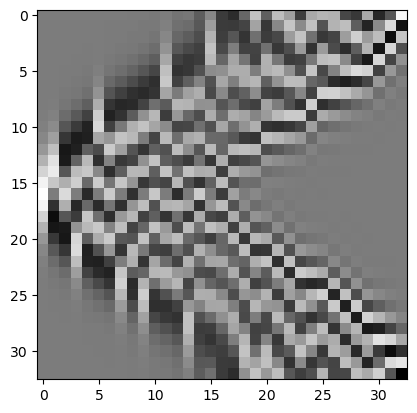

PyObject <matplotlib.image.AxesImage object at 0x7fba4eb99910>

In [14]:
imshow(hv, cmap = "gray")

In [37]:
G(m, μ, θ) = sum([hv[m + j + 1, l + 1] * kv(θ)[l + 1] * hv[μ + j + 1, l + 1] for l in 0:2j]); # Evolution operator

In [78]:
P(θ) = reshape([G(m, μ, θ) for μ in -j:j for m in -j:j], (2j + 1, 2j + 1));

In [138]:
evol(θ) = abs2.(P(θ) * normalize(hdc(8)));

In [139]:
evolT = [evol(l) for l in 1:length(α)];

In [140]:
r = zeros(Float64, (2j + 1, length(α)))
for l in 1:(2j + 1)
    for m in 1:length(α)
        r[l, m] = evolT[m][l]
    end
end

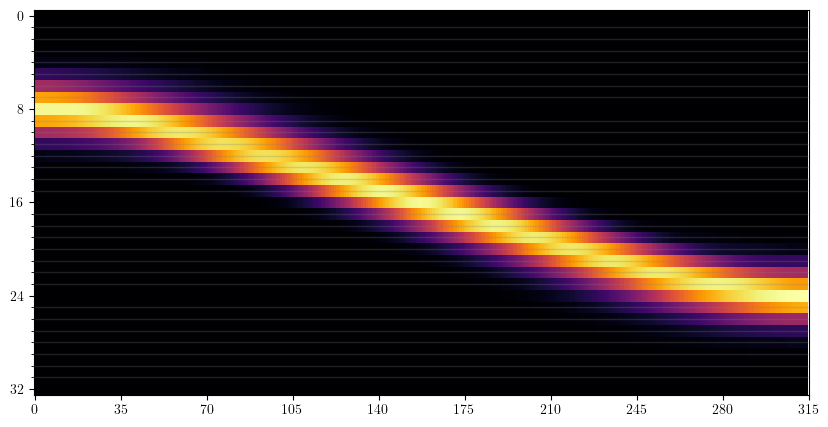

In [154]:
fig_1 = figure(figsize = (10, 5))
ax_1 = gca()

ax_1.imshow(r, cmap = "inferno")
ax_1.set_aspect("auto")
ax_1.set_xticks(0:35:315, minor = false)
ax_1.set_yticks(0:8:2j, minor = false)

ax_1.set_yticks(1:1:2j, minor = true)
ax_1.grid(which = "minor", color = "gray", linestyle = "-", linewidth = 1, alpha = 0.25)